

# Data Science amb Python

**Cristiane de Souza da Silva**

**Març 2021**

**Tasca 7 - Sprint 5 : Transformació Registre Log amb Regular expressions**


## Exercici 1

Normalitza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources".

In [1]:
import numpy as np, pandas as pd
import re

Para la normalización, primero se decidió cómo dividir el encabezado del texto en varias columnas.

Investigué en el sitio web de  [Apache](https://httpd.apache.org/docs/2.4/logs.html) cómo se realizó un acceso al registro.

Las principales divisiones consideradas fueron:

- current_computer: computadora actual utilizada para el acceso 
- ip_adress: dirección única que identifica un dispositivo 
- time: hora en que se realizó el acceso
- client_request: La línea de solicitud del cliente 
- HTTP_status: Este es el código de estado que el servidor envía al cliente.
- user_agent: es el encabezado de solicitud HTTP del agente de usuario.


In [2]:
log_columns = ['current_computer', 'ip_adress', 'time','client_request', 'HTTP_status', 'user_agent' ]
log_columns

['current_computer',
 'ip_adress',
 'time',
 'client_request',
 'HTTP_status',
 'user_agent']

## Exercici 2

Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web.

In [3]:
access_log = pd.read_csv('Web_access_log-akumenius.com.txt',sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                         engine='python', header=None, parse_dates=True) 
                         
access_log.head()

,0,1,2,3,4,5,6,7,8,9,10
0,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,-,"""-""","""Apache (internal dummy connection)""",VLOG=-
1,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,-,"""-""","""Apache (internal dummy connection)""",VLOG=-
2,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,-,"""-""","""Apache (internal dummy connection)""",VLOG=-
3,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,-,"""-""","""Apache (internal dummy connection)""",VLOG=-
4,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,-,"""-""","""Apache (internal dummy connection)""",VLOG=-


In [4]:
#Remove columns with dash ("-")

access_log = access_log.drop([2, 3,7,8, 10], axis=1)
access_log

,0,1,4,5,6,9
0,localhost,127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,"""Apache (internal dummy connection)"""
1,localhost,127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,"""Apache (internal dummy connection)"""
2,localhost,127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,"""Apache (internal dummy connection)"""
3,localhost,127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,"""Apache (internal dummy connection)"""
4,localhost,127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,"""Apache (internal dummy connection)"""
...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,[02/Mar/2014:03:05:39 +0100],"""GET / HTTP/1.1""",200,"""Mozilla/5.0 (compatible; YandexBot/3.0; +http..."
261869,www.akumenius.com,74.86.158.107,[02/Mar/2014:03:09:52 +0100],"""HEAD / HTTP/1.1""",200,"""Mozilla/5.0+(compatible; UptimeRobot/2.0; htt..."
261870,localhost,127.0.0.1,[02/Mar/2014:03:10:18 +0100],"""OPTIONS * HTTP/1.0""",200,"""Apache (internal dummy connection)"""
261871,localhost,127.0.0.1,[02/Mar/2014:03:10:18 +0100],"""OPTIONS * HTTP/1.0""",200,"""Apache (internal dummy connection)"""


In [5]:
access_log.columns = log_columns
access_log.head()

,current_computer,ip_adress,time,client_request,HTTP_status,user_agent
0,localhost,127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,"""Apache (internal dummy connection)"""
1,localhost,127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,"""Apache (internal dummy connection)"""
2,localhost,127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,"""Apache (internal dummy connection)"""
3,localhost,127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,"""Apache (internal dummy connection)"""
4,localhost,127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,"""Apache (internal dummy connection)"""


In [6]:
#change time column and convert it to date time
access_log.time = access_log.time.str.replace('[', '').str.replace(']', '')

access_log.head()

,current_computer,ip_adress,time,client_request,HTTP_status,user_agent
0,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0""",200,"""Apache (internal dummy connection)"""
1,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0""",200,"""Apache (internal dummy connection)"""
2,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0""",200,"""Apache (internal dummy connection)"""
3,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0""",200,"""Apache (internal dummy connection)"""
4,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0""",200,"""Apache (internal dummy connection)"""


In [7]:
access_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261873 entries, 0 to 261872
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   current_computer  261873 non-null  object
 1   ip_adress         261873 non-null  object
 2   time              261873 non-null  object
 3   client_request    261873 non-null  object
 4   HTTP_status       261873 non-null  int64 
 5   user_agent        261873 non-null  object
dtypes: int64(1), object(5)
memory usage: 12.0+ MB


In [8]:
#from datetime import datetime

access_log['time'] = pd.to_datetime(access_log['time'],format='%d/%b/%Y:%H:%M:%S %z')
access_log.head()

,current_computer,ip_adress,time,client_request,HTTP_status,user_agent
0,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,"""OPTIONS * HTTP/1.0""",200,"""Apache (internal dummy connection)"""
1,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,"""OPTIONS * HTTP/1.0""",200,"""Apache (internal dummy connection)"""
2,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,"""OPTIONS * HTTP/1.0""",200,"""Apache (internal dummy connection)"""
3,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,"""OPTIONS * HTTP/1.0""",200,"""Apache (internal dummy connection)"""
4,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,"""OPTIONS * HTTP/1.0""",200,"""Apache (internal dummy connection)"""


In [9]:
access_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261873 entries, 0 to 261872
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype                               
---  ------            --------------   -----                               
 0   current_computer  261873 non-null  object                              
 1   ip_adress         261873 non-null  object                              
 2   time              261873 non-null  datetime64[ns, pytz.FixedOffset(60)]
 3   client_request    261873 non-null  object                              
 4   HTTP_status       261873 non-null  int64                               
 5   user_agent        261873 non-null  object                              
dtypes: datetime64[ns, pytz.FixedOffset(60)](1), int64(1), object(4)
memory usage: 12.0+ MB


In [10]:
access_log.isnull().sum()

current_computer    0
ip_adress           0
time                0
client_request      0
HTTP_status         0
user_agent          0
dtype: int64

## Exercici 2

Geolocalitza les IP's. 

IP geocalization I used, it was the free Geolite2 IP : https://dev.maxmind.com/geoip/geoip2/geolite2/

As locallhost refers to the location of the system being used (the user's "home"), I decided to remove it because the country where the IP is located would not be shown.

In [12]:
#Remove the 'locallhost' data
access_new = access_log[(access_log['current_computer'] != 'localhost' )].reset_index(drop=True)
access_new.head()                

,current_computer,ip_adress,time,client_request,HTTP_status,user_agent
0,www.akumenius.com,66.249.76.216,2014-02-23 03:10:31+01:00,"""GET /hoteles-baratos/ofertas-hotel-Club-&-Hot...",404,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."
1,www.akumenius.com,66.249.76.216,2014-02-23 03:10:33+01:00,"""GET /hoteles-baratos/ofertas-hotel-Metropolis...",404,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."
2,www.akumenius.com,66.249.76.216,2014-02-23 03:10:35+01:00,"""GET /hoteles-baratos/ofertas-hotel-Faena-Hote...",404,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."
3,www.akumenius.com,66.249.76.216,2014-02-23 03:10:38+01:00,"""GET /hoteles-baratos/ofertas-hotel-Kensington...",404,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."
4,www.akumenius.com,66.249.76.216,2014-02-23 03:10:39+01:00,"""GET /destinos-baratos/destinosEstrelles/hotel...",200,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."


In [13]:
access_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247746 entries, 0 to 247745
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype                               
---  ------            --------------   -----                               
 0   current_computer  247746 non-null  object                              
 1   ip_adress         247746 non-null  object                              
 2   time              247746 non-null  datetime64[ns, pytz.FixedOffset(60)]
 3   client_request    247746 non-null  object                              
 4   HTTP_status       247746 non-null  int64                               
 5   user_agent        247746 non-null  object                              
dtypes: datetime64[ns, pytz.FixedOffset(60)](1), int64(1), object(4)
memory usage: 11.3+ MB


There are 247746 log access. However the goal is to show the location of each ip, so they will be grouped together and a table created showing them as unique.

In [14]:
#Creating a function to use Geolite2

from geoip import geolite2
import geoip2.database

def ip_info(ip):
    with geoip2.database.Reader('GeoLite2-Country.mmdb') as reader:
        response = reader.country(ip)
        return response.country.name
  

In [15]:
access_country = access_new.copy()

access_country['country'] = access_country.loc[:,'ip_adress'].apply(lambda x: ip_info(x))

access_country.head()

,current_computer,ip_adress,time,client_request,HTTP_status,user_agent,country
0,www.akumenius.com,66.249.76.216,2014-02-23 03:10:31+01:00,"""GET /hoteles-baratos/ofertas-hotel-Club-&-Hot...",404,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States
1,www.akumenius.com,66.249.76.216,2014-02-23 03:10:33+01:00,"""GET /hoteles-baratos/ofertas-hotel-Metropolis...",404,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States
2,www.akumenius.com,66.249.76.216,2014-02-23 03:10:35+01:00,"""GET /hoteles-baratos/ofertas-hotel-Faena-Hote...",404,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States
3,www.akumenius.com,66.249.76.216,2014-02-23 03:10:38+01:00,"""GET /hoteles-baratos/ofertas-hotel-Kensington...",404,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States
4,www.akumenius.com,66.249.76.216,2014-02-23 03:10:39+01:00,"""GET /destinos-baratos/destinosEstrelles/hotel...",200,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States


## Exercici 3

Mostra'm la teva creativitat, Sorprèn-me fes un pas més enllà amb l'anàlisi anterior.

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#Information about the new table
access_country.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247746 entries, 0 to 247745
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype                               
---  ------            --------------   -----                               
 0   current_computer  247746 non-null  object                              
 1   ip_adress         247746 non-null  object                              
 2   time              247746 non-null  datetime64[ns, pytz.FixedOffset(60)]
 3   client_request    247746 non-null  object                              
 4   HTTP_status       247746 non-null  int64                               
 5   user_agent        247746 non-null  object                              
 6   country           246765 non-null  object                              
dtypes: datetime64[ns, pytz.FixedOffset(60)](1), int64(1), object(5)
memory usage: 13.2+ MB


In [25]:
access_country.isnull().sum()

current_computer      0
ip_adress             0
time                  0
client_request        0
HTTP_status           0
user_agent            0
country             981
dtype: int64

There are 981 access without information about the country. The table will be filled with 'unspecified country'

In [27]:
access_country["country"].fillna("unspecified country", inplace = True)
access_country.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247746 entries, 0 to 247745
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype                               
---  ------            --------------   -----                               
 0   current_computer  247746 non-null  object                              
 1   ip_adress         247746 non-null  object                              
 2   time              247746 non-null  datetime64[ns, pytz.FixedOffset(60)]
 3   client_request    247746 non-null  object                              
 4   HTTP_status       247746 non-null  int64                               
 5   user_agent        247746 non-null  object                              
 6   country           247746 non-null  object                              
dtypes: datetime64[ns, pytz.FixedOffset(60)](1), int64(1), object(5)
memory usage: 13.2+ MB


In [40]:
#How many access per country 

access_country['country'].value_counts().head(10)

Spain             149117
United States      69890
China               6976
Netherlands         6305
Germany             1987
France              1724
Mexico              1244
Brazil              1101
United Kingdom      1073
Italy               1042
Name: country, dtype: int64

Text(0.5, 1.0, 'Access per Country (Top 10)')

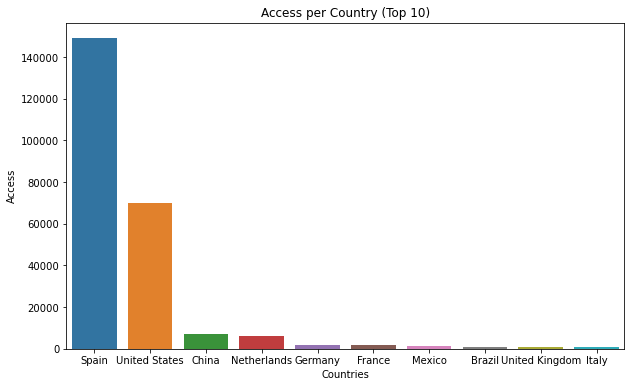

In [51]:
#Top 10 access country

plt.figure(figsize=(10,6))

#seaborn.barplot(x=df.reputation.value_counts().index, y=df.reputation.value_counts())

sns.barplot(x= access_country['country'].value_counts().head(10).index, y=access_country['country'].value_counts().head(10) )
plt.xlabel("Countries")
plt.ylabel('Access')
plt.title('Access per Country (Top 10)')

In [45]:
# Time access

df_box = access_country.copy()
df_box.reset_index(inplace=True)
df_box['hour'] = [d.hour for d in df_box.time]

df_box.head()


,index,current_computer,ip_adress,time,client_request,HTTP_status,user_agent,country,hour
0,0,www.akumenius.com,66.249.76.216,2014-02-23 03:10:31+01:00,"""GET /hoteles-baratos/ofertas-hotel-Club-&-Hot...",404,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,3
1,1,www.akumenius.com,66.249.76.216,2014-02-23 03:10:33+01:00,"""GET /hoteles-baratos/ofertas-hotel-Metropolis...",404,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,3
2,2,www.akumenius.com,66.249.76.216,2014-02-23 03:10:35+01:00,"""GET /hoteles-baratos/ofertas-hotel-Faena-Hote...",404,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,3
3,3,www.akumenius.com,66.249.76.216,2014-02-23 03:10:38+01:00,"""GET /hoteles-baratos/ofertas-hotel-Kensington...",404,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,3
4,4,www.akumenius.com,66.249.76.216,2014-02-23 03:10:39+01:00,"""GET /destinos-baratos/destinosEstrelles/hotel...",200,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,3


In [48]:
df_box['hour'].value_counts().sort_values()

6      3027
7      3329
5      3958
2      4157
4      5140
1      5351
3      5596
8      6458
0      8187
23     8358
9      9058
21     9679
10     9740
22    10310
19    11664
14    11880
20    13302
18    14360
11    14435
13    14935
17    16778
16    19074
15    19210
12    19760
Name: hour, dtype: int64

Text(0.5, 1.0, 'Access ')

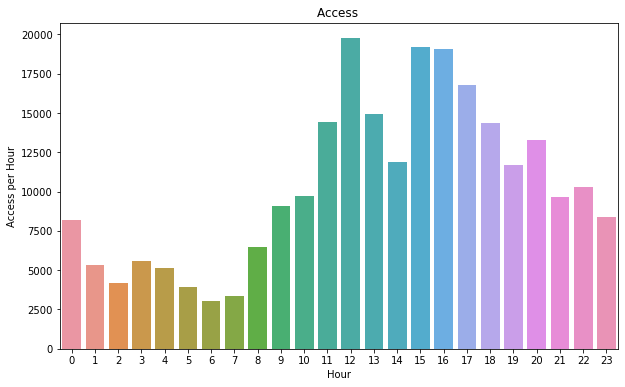

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_box['hour'].value_counts().sort_values().index, y=df_box['hour'].value_counts().sort_values())
plt.xlabel("Hour")
plt.ylabel('Access per Hour')
plt.title('Access ')